# Homework 4

## Problem 1

Use the $\texttt{False Position}$ method in the $\texttt{Roots.jl}$ package in Julia to find the roots of 

1.  $f(x) = x \cos(x)$
2.  $f(x) = x^2 \ln(x)$
3.  $f(x) = (x-1)^2$

Plot each curve to make sure your results are reasonable.  If the $\texttt{False Position}$ method, try another option.  Give some thought to  the accuracy.

In [18]:
using Roots
f(x)=x*cos(x)
g(x)=x^2*log(x)
h(x)=(x-1)^2

h (generic function with 1 method)

In [19]:
find_zero(f, (-2pi,2pi), FalsePosition())

0.0

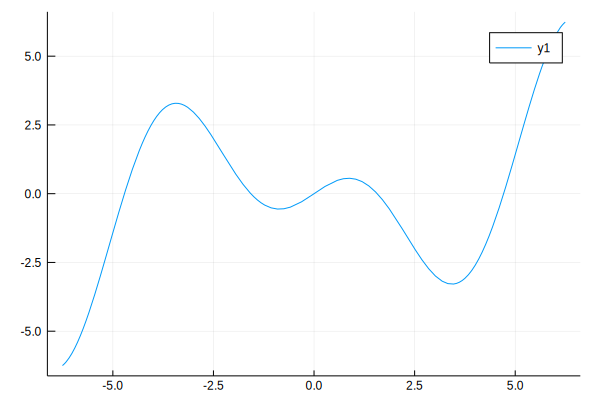

In [20]:
using Plots
plot(f,-2*pi,2*pi)

In [21]:
find_zero(g, (0,2), FalsePosition())

1.0

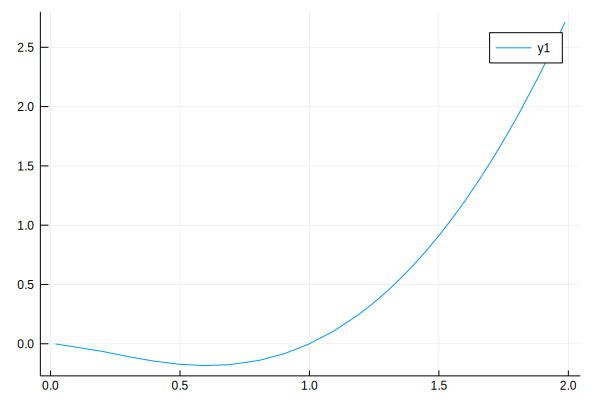

In [22]:
plot(g,0,2)

In [23]:
find_zero(h, (-1,1), FalsePosition())

0.9999999701976776

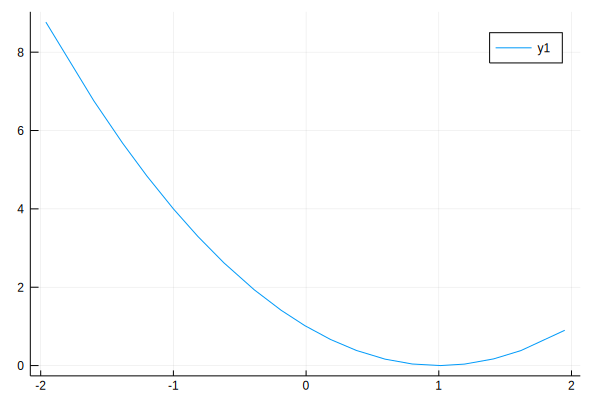

In [24]:
plot(h,-2,2)

## Problem 2

Find by hand the quadratic interpolating polynomial to $\ln(x)$ through $x=1,2,3$.  Typeset your results in a Markdown cell.

$x_1 = 1, \text{ } x_2 = 2, \text{ }x_3 = 3$
\begin{align}
L_1(x) &= \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}\\
L_2(x) &= \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}\\
L_3(x) &= \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}
\end{align}
$L_1(x) =\frac{(x-2)(x-3)}{(1-2)(1-3)}=0.5x^2-2.5x+3$

$L_2(x) = \frac{(x-1)(x-3)}{(2-1)(2-3)}=-x^2+4x-3$

$L_3(x) = \frac{(x-1)(x-2)}{(3-1)(3-2)}=0.5x^2-1.5x+1$

$$p_2(x) = y_1 L_1(x) + y_2 L_2(x) + y_3 L_3(x)$$

$y_1=ln(x_1)=ln(1)=0$

$y_2=ln(x_2)=ln(2)$

$y_3=ln(x_3)=ln(3) $

$p_2(x) = ln(2)*(-x^2+4x-3) + ln(3)*(0.5x^2-1.5x+1)$

## Problem 3

Redo Problem 2 using the $\texttt{Polynomials.jl}$ package in Julia and without writing a function to do it.

In [14]:
using Polynomials
f(x) = log(x)
x1 = 1.
x2 = 2.
x3 = 3.
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)
L1 = poly([x2, x3])./( (x1-x2)*(x1-x3) )

Poly(3.0 - 2.5*x + 0.5*x^2)

In [15]:
L2 = poly([x1, x3])./( (x2-x1)*(x2-x3) )

Poly(-3.0 + 4.0*x - 1.0*x^2)

In [16]:
L3 = poly([x1, x2])./( (x3-x1)*(x3-x2) )

Poly(1.0 - 1.5*x + 0.5*x^2)

In [17]:
p2 = y1*L1 + y2*L2 + y3*L3

Poly(-0.9808292530117262 + 1.1246702892376168*x - 0.1438410362258905*x^2)

## Problem 4

Redo Problem 2 in Julia using the Lagrange function you were given in Unit 3.2

In [6]:
R(x)=log.(x)

R (generic function with 1 method)

In [7]:
using Polynomials
function Lagrange(x,y) #build the n-th order Lagrange interpolating polynomial through {(x_j,y_j)}, j=1,...,n+1
    N = length(x) # N = n+1
    P = Poly([0.]) # initialize a polynomial type to 0.  Note the capital P in Poly to indicate that the entry is a coeff.
    for j = 1:N #loop over the shape functions
        L = Poly([1.]) # initialize the shape function to a polynomial type equal to 1.
        for k = 1:N # compute L_k
            if k != j
                L = L*poly([x[k]])/(x[j]-x[k]) # Use poly with lower case p to define by root
            end
        end
        P = P + y[j]*L
    end
    return P
end

Lagrange (generic function with 1 method)

In [13]:
Lagrange([1.,2.,3.],[log(1.), log(2.), log(3.)])

Poly(-0.9808292530117262 + 1.1246702892376168*x - 0.1438410362258905*x^2)